In [191]:
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
# reset_index() demo
s = pd.Series([1, 2, 3, 4], name='foo',
              index=pd.Index(['a', 'b', 'c', 'd'], name='idx'))
print(s)
print('-'*50)
print(s.reset_index())
print('-'*50)
after_reset_index = s.reset_index(name='This is original value column name')
print(after_reset_index)

idx
a    1
b    2
c    3
d    4
Name: foo, dtype: int64
--------------------------------------------------
  idx  foo
0   a    1
1   b    2
2   c    3
3   d    4
--------------------------------------------------
  idx  This is original value column name
0   a                                   1
1   b                                   2
2   c                                   3
3   d                                   4


# 看每一個時間區間有多少的資料

先以"月"為單位

In [193]:
df_newtaipei = pd.read_csv("../data/內政部實價登錄_data/新北市_10101_11303_房價data.csv")
df_taipei = pd.read_csv("../data/內政部實價登錄_data/台北市_10101_11303_房價data.csv")

In [194]:
df_newtaipei['transaction_date'] = pd.to_datetime(df_newtaipei['transaction_date'])

# 新增一個月頻率的欄位，用來合併經濟指標用的
df_newtaipei['year_month_for_combine'] = df_newtaipei['transaction_date'].dt.to_period('M')


df_taipei['transaction_date'] = pd.to_datetime(df_taipei['transaction_date'])
# 新增一個月頻率的欄位，用來合併經濟指標用的
df_taipei['year_month_for_combine'] = df_taipei['transaction_date'].dt.to_period('M')

In [195]:
# 看每一個 group有多少筆資料 用size()
each_month_newtaipei = df_newtaipei.groupby('year_month_for_combine').size()
each_month_taipei = df_newtaipei.groupby('year_month_for_combine').size()

In [214]:
# 每Q的資料筆數
totoal_per_month = each_month_newtaipei.values + each_month_taipei.values
print(totoal_per_month)
len(totoal_per_month)

[   84    90   216   374   358   672  4850  8114 10080 11958  8712 11304
  8060  6436 12006 12168 12694 11746 13008 10684 10944 12832 12992 12526
  5766  5362  9484  9360  9434  7558  8616  7316  7700  8414  8796  9854
  5304  4060  7484  6918  6486  7248  6582  5550  5332  6418  7834  7688
  3846  2402  5146  5678  6658  6242  6828  6280  5676  6362  6738  8698
  4284  4548  6916  7768  8274  7666  7070  6776  7066  7534  7920  8514
  7000  4244  8418  7632  8862  7928  7848  8182  7948  8658  7652  8236
  8120  5020  9282  9278  9408  9366  9554  8334  9188  9966  9642  9684
  6426  7584  8904  7738 10836 11556 11928 11766 10918 11184 10770  9982
  8940  6540 11960 11150  7780  4254  7296  9358  9636 10960  9868  9878
  7256  5828  9750  8068  6396  6376  6752  5840  5932  5804  5674  6292
  3538  5606  7958  7122  7244  6868  6974  6708  6836  7260  7390  7324
  6732  4518  5734]


147

In [208]:
# 將Series轉成dataframe
each_month_df = each_month_taipei.reset_index(name='counts')
# period[M]轉回datetime才能畫圖
each_month_df['year_month_for_combine'] = each_month_df['year_month_for_combine'].dt.to_timestamp()

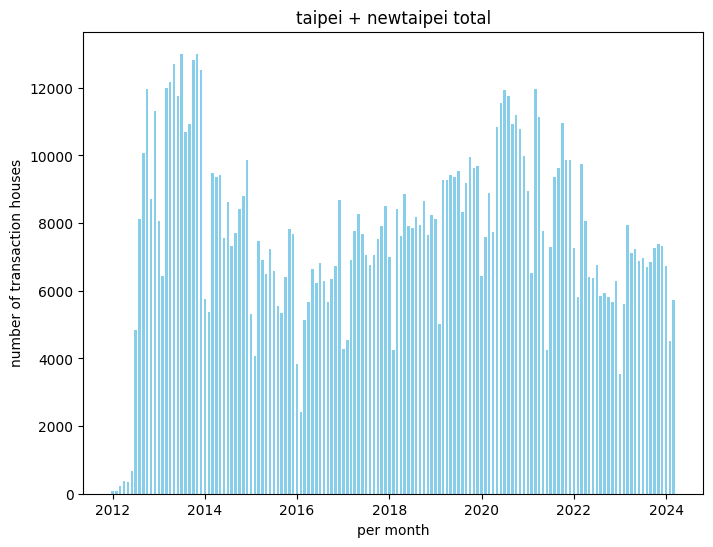

In [213]:
plt.figure(figsize=(8, 6))
plt.bar(each_month_df['year_month_for_combine'], totoal_per_month, color='skyblue', width=20 )
plt.xlabel('per month')
plt.ylabel('number of transaction houses')
plt.title('taipei + newtaipei total')
plt.show()